In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [6]:
ref = 3.2e-5

In [2]:
colors = [
    '#e66101',
    '#fdb863',
    '#b2abd2',
    '#5e3c99'
]

In [3]:
os.chdir('../numerical_examples/data')

with open("bre_sus_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
bre_sus_dim_2 = pd.DataFrame(loaded_results)

with open("bre_bss_dim_50_l1.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_50_l1 = pd.DataFrame(loaded_results)

with open("bre_bss_dim_50_l2.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_50_l2 = pd.DataFrame(loaded_results)

with open("him_sus_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
him_sus_dim_2 = pd.DataFrame(loaded_results)
him_sus_dim_2['total_maxima']= him_sus_dim_2['region_indicator'].apply(sum)


with open("him_bss_dim_50_l1.json", 'r') as file:
    loaded_results = json.load(file)
him_bss_dim_50_l1 = pd.DataFrame(loaded_results)
him_bss_dim_50_l1['total_maxima']= him_bss_dim_50_l1['region_indicator'].apply(sum)


with open("him_bss_dim_50_l2.json", 'r') as file:
    loaded_results = json.load(file)
him_bss_dim_50_l2 = pd.DataFrame(loaded_results)
him_bss_dim_50_l2['total_maxima']= him_bss_dim_50_l2['region_indicator'].apply(sum)

os.chdir('../../figures')

In [8]:
def evals_error(data):
    estimates = np.array(data['exceedance_estimate'])
    error = mean_squared_error(np.log(ref) * np.ones(len(estimates)), np.log(estimates))
    evals = np.array(data['performance_evaluation']).mean()
    return evals, error

def evals_sum(data):
    avg_sum = data['total_maxima'].mean()
    evals = np.array(data['performance_evaluation']).mean()
    return evals, avg_sum

In [10]:
bre_sus_dim_2_points = []
for size in [100,250,500,750,1000,1250,1500,2000,3000]:
    bre_sus_dim_2_points.append(evals_error(bre_sus_dim_2[bre_sus_dim_2['size']==size]))

bre_bss_dim_50_l1_points = []
for reg in [0.5,2,5,10]:
    bre_bss_dim_50_l1_points.append(evals_error(bre_bss_dim_50_l1[bre_bss_dim_50_l1['reg'] == reg]))

bre_bss_dim_50_l2_points = []
for reg in [0.5,2,5,10]:
    bre_bss_dim_50_l2_points.append(evals_error(bre_bss_dim_50_l2[bre_bss_dim_50_l2['reg'] == reg]))
    
him_sus_dim_2_points = []
for size in [100,500,1000,1500,2000]:
    him_sus_dim_2_points.append(evals_sum(him_sus_dim_2[him_sus_dim_2['size']==size]))

him_bss_dim_50_l1_points = []
for reg in [0.5,2,5,10]:
    him_bss_dim_50_l1_points.append(evals_sum(him_bss_dim_50_l1[him_bss_dim_50_l1['reg'] == reg]))

him_bss_dim_50_l2_points = []
for reg in [0.5,2,5,10]:
    him_bss_dim_50_l2_points.append(evals_sum(him_bss_dim_50_l2[him_bss_dim_50_l2['reg'] == reg]))


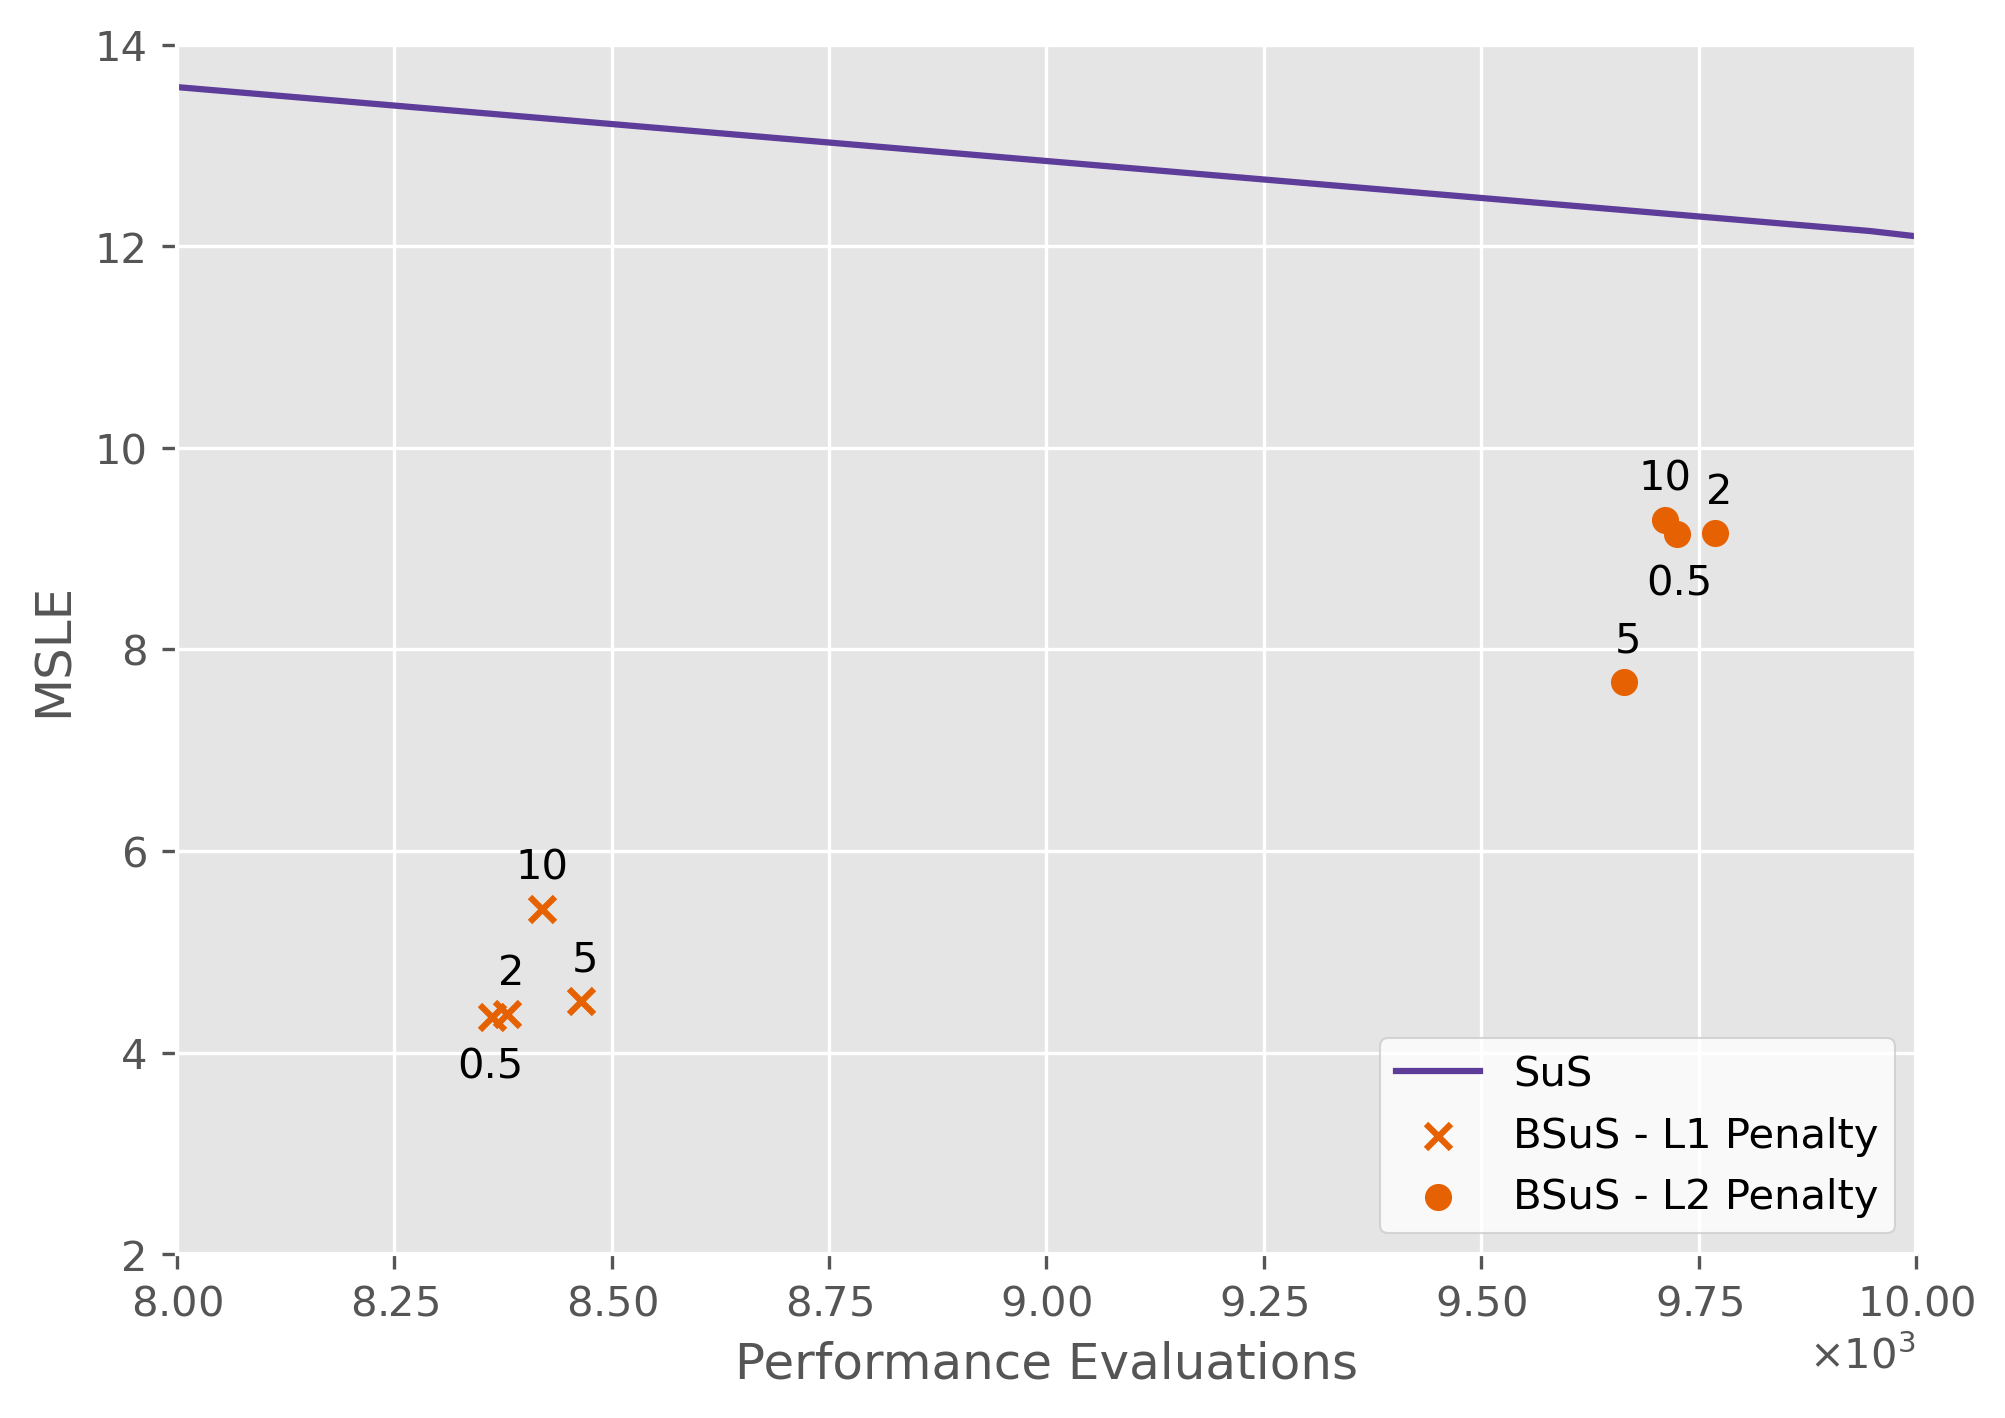

In [11]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

plotter = np.array(bre_sus_dim_2_points)[2:].T
plt.plot(plotter[0],
         plotter[1],
         color=colors[3],
         label='SuS')


plotter = np.array(bre_bss_dim_50_l1_points)[:].T
plt.scatter(plotter[0],
            plotter[1],
            color=colors[0],
            marker='x',
            label='BSuS - L1 Penalty')

plt.text(plotter[0][0]-40,plotter[1][0]-0.6,'0.5')
plt.text(plotter[0][1]-10,plotter[1][1]+0.3,'2')
plt.text(plotter[0][2]-10,plotter[1][2]+0.3,'5')
plt.text(plotter[0][3]-30,plotter[1][3]+0.3,'10')

plotter = np.array(bre_bss_dim_50_l2_points)[:].T
plt.scatter(plotter[0],
            plotter[1],
            color=colors[0],
            marker='o',
            label='BSuS - L2 Penalty')


plt.text(plotter[0][0]-35,plotter[1][0]-0.6,'0.5')
plt.text(plotter[0][1]-10,plotter[1][1]+0.3,'2')
plt.text(plotter[0][2]-10,plotter[1][2]+0.3,'5')
plt.text(plotter[0][3]-30,plotter[1][3]+0.3,'10')

plt.xlim(8e3,10e3)
plt.ylim(2,14)
plt.xlabel('Performance Evaluations')
plt.ylabel('MSLE')
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.legend(
           frameon=True,
           facecolor='white',
            loc='lower right')

plt.savefig('linear_sensitivity.pdf',bbox_inches='tight')




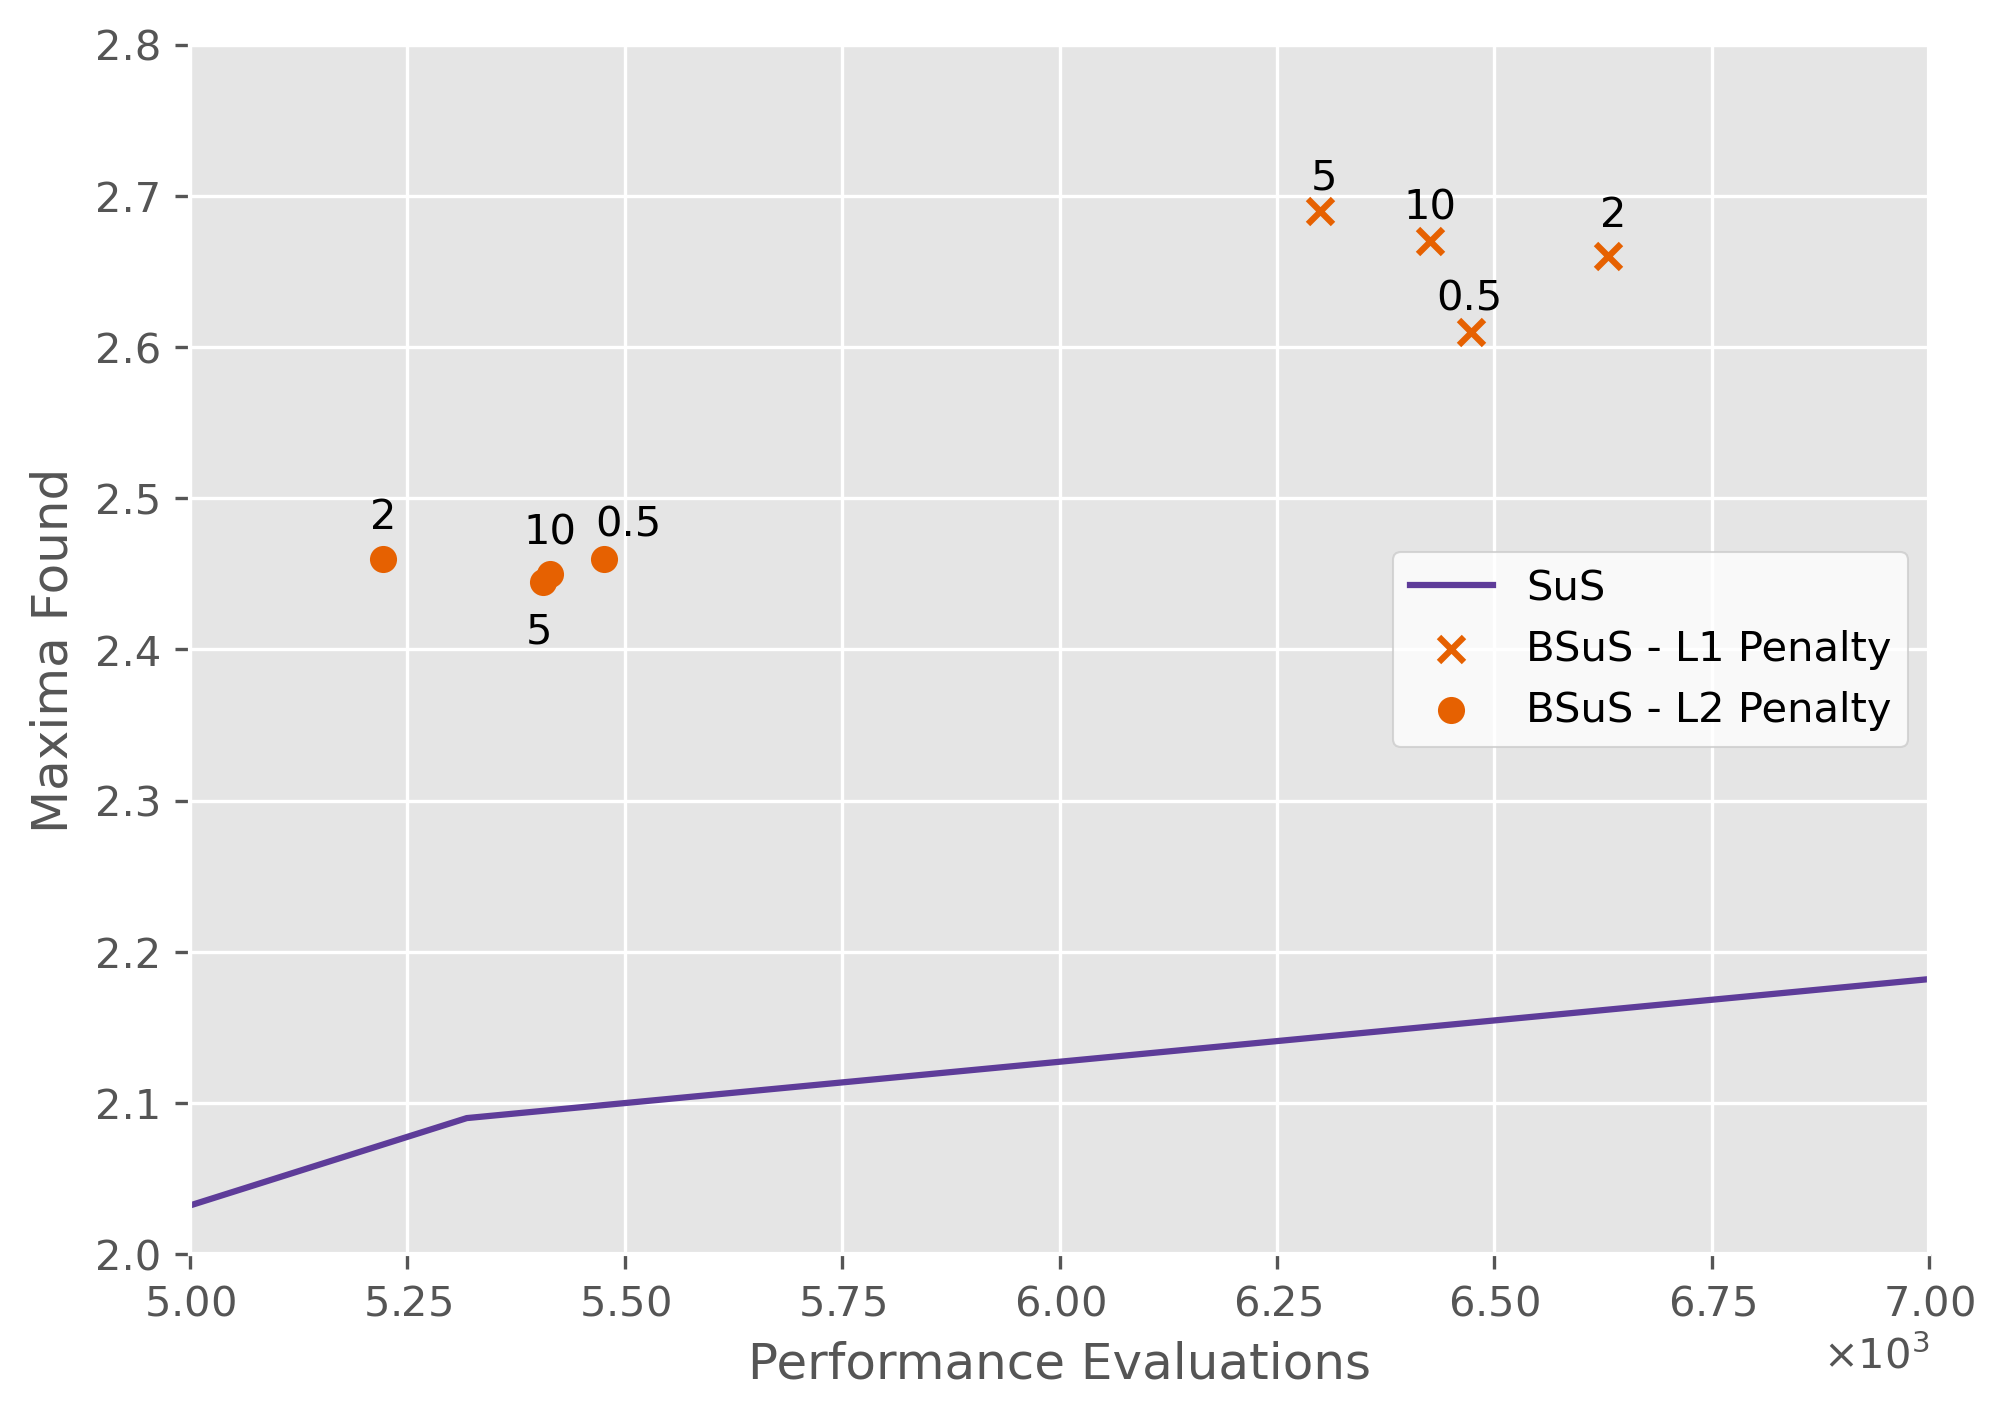

In [12]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

plotter = np.array(him_sus_dim_2_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         color=colors[3],
         label='SuS')


plotter = np.array(him_bss_dim_50_l1_points)[:].T
plt.scatter(plotter[0],
            plotter[1],
            color=colors[0],
            marker='x',
            label='BSuS - L1 Penalty')


plt.text(plotter[0][0]-40,plotter[1][0]+0.015,'0.5')
plt.text(plotter[0][1]-10,plotter[1][1]+0.02,'2')
plt.text(plotter[0][2]-10,plotter[1][2]+0.015,'5')
plt.text(plotter[0][3]-30,plotter[1][3]+0.015,'10')

plotter = np.array(him_bss_dim_50_l2_points)[:].T
plt.scatter(plotter[0],
            plotter[1],
            color=colors[0],
            marker='o',
            label='BSuS - L2 Penalty')

plt.text(plotter[0][0]-10,plotter[1][0]+0.015,'0.5')
plt.text(plotter[0][1]-15,plotter[1][1]+0.02,'2')
plt.text(plotter[0][2]-20,plotter[1][2]-0.04,'5')
plt.text(plotter[0][3]-30,plotter[1][3]+0.02,'10')



plt.xlim(5e3,7e3)
plt.ylim(2,2.8)
plt.xlabel('Performance Evaluations')
plt.ylabel('Maxima Found')
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.legend(
           frameon=True,
           facecolor='white',
            loc='center right')

plt.savefig('himmel_sensitivity.pdf',bbox_inches='tight')


